In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from pprint import pprint

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet, vgg11, extract_layer_names
from solver import Solver, load_solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


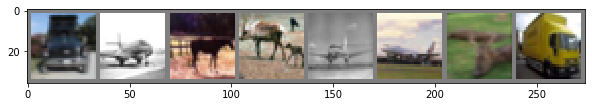

     truck    plane    horse     deer    plane    plane     deer    truck


In [4]:
batch_size = 64
subset_size = -1
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size, subset_size=subset_size)

classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)
# net = vgg11()
# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam')

In [6]:
solver.train(num_epochs=5, log_every=4, plot=True, verbose=False)

Loading BokehJS ...

In [7]:
best_solver = solver.best_solver

best_solver.print_bokeh_plots()

Loading BokehJS ...

Loading BokehJS ...

In [8]:
best_solver.train(num_epochs=5, plot=True, verbose=False, log_every=4)

Loading BokehJS ...

In [9]:
net = ExampleNet()
#models.vgg16(pretrained=False)

layers = extract_layer_names(net)
pprint(layers)

{'conv1_conv1': array([[[[-0.04213861,  0.02547342, -0.07473297,  0.08197302,
          -0.03444431],
         [ 0.04595488, -0.06810157,  0.01887175,  0.02041553,
           0.0041954 ],
         [ 0.09745282,  0.01777506,  0.00285469, -0.03679178,
          -0.04986795],
         [-0.04985242, -0.00233733, -0.06776953,  0.07695484,
           0.02112085],
         [ 0.07216522,  0.1083755 , -0.00806547,  0.00441714,
          -0.0423805 ]],

        [[ 0.03736044, -0.05885946, -0.06369933, -0.00141461,
           0.07916592],
         [ 0.04582599, -0.0847864 , -0.00110308,  0.03348948,
           0.02268608],
         [-0.06649925, -0.07109573,  0.01069109, -0.04380913,
           0.09443319],
         [-0.06686506, -0.01016492, -0.03753442, -0.01795084,
          -0.00497186],
         [ 0.09216835, -0.11404587,  0.04559839, -0.11220104,
          -0.10180459]],

        [[-0.04870896, -0.05735562,  0.05211262, -0.03483445,
          -0.03283811],
         [ 0.10148403,  0.03306994

In [10]:
from norms import l2_norm_product
l2_norm_result = l2_norm_product(layers) 
print(l2_norm_result)

199.8183672487002
